   Patient ID        patient_name  age gender              Phone blood_type  \
0           1       Guido O' Gara   63   Male  +264 355 532 6049          A   
1           2     Kennie Blockley   12   Male   +62 449 137 7638          O   
2           3    Sheffie Kennford   77   Male  +387 392 769 7795         AB   
3           4        Noel Hearsum  100   Male   +62 951 323 1087          A   
4           5  Osbourne Oakeshott   71   Male  +507 355 806 1389          O   

  diagnosis_code admission_date discharge_date  Primary Diagnosis  ...  \
0        S92532P     10/14/2015     10/30/2000           Migraine  ...   
1        T481X5S      10/8/2015      7/10/2011       Appendicitis  ...   
2        S63610A       9/9/2004      2/15/2005          Pneumonia  ...   
3          T3995      7/11/2017       8/7/2018  Allergic reaction  ...   
4           Z821       2/1/2012     11/22/2022        Common cold  ...   

                Discharge Status Follow-Up Visits    Insurance Type  \
0        

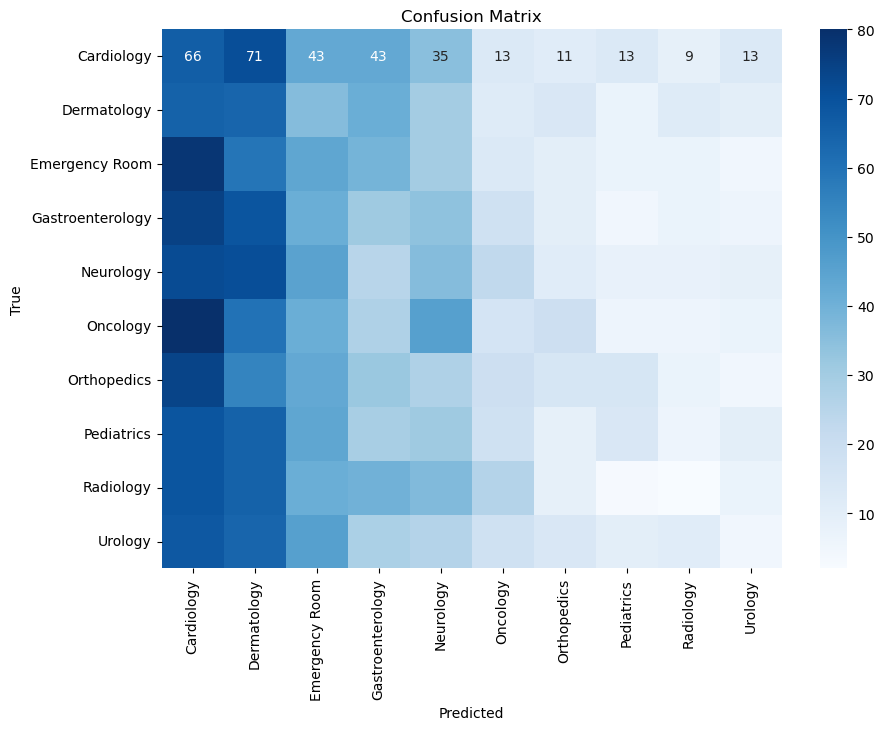

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r)

# Display the first few rows of the dataset
print(df.head())

# Select the target column (for this example, we'll use 'Hospital Department')
target = 'Hospital Department'

# Handle missing values (if any)
df = df.dropna()

# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' and column != target:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


   Patient ID        patient_name  age gender              Phone blood_type  \
0           1       Guido O' Gara   63   Male  +264 355 532 6049          A   
1           2     Kennie Blockley   12   Male   +62 449 137 7638          O   
2           3    Sheffie Kennford   77   Male  +387 392 769 7795         AB   
3           4        Noel Hearsum  100   Male   +62 951 323 1087          A   
4           5  Osbourne Oakeshott   71   Male  +507 355 806 1389          O   

  diagnosis_code admission_date discharge_date  Primary Diagnosis  ...  \
0        S92532P     10/14/2015     10/30/2000           Migraine  ...   
1        T481X5S      10/8/2015      7/10/2011       Appendicitis  ...   
2        S63610A       9/9/2004      2/15/2005          Pneumonia  ...   
3          T3995      7/11/2017       8/7/2018  Allergic reaction  ...   
4           Z821       2/1/2012     11/22/2022        Common cold  ...   

                Discharge Status Follow-Up Visits    Insurance Type  \
0        

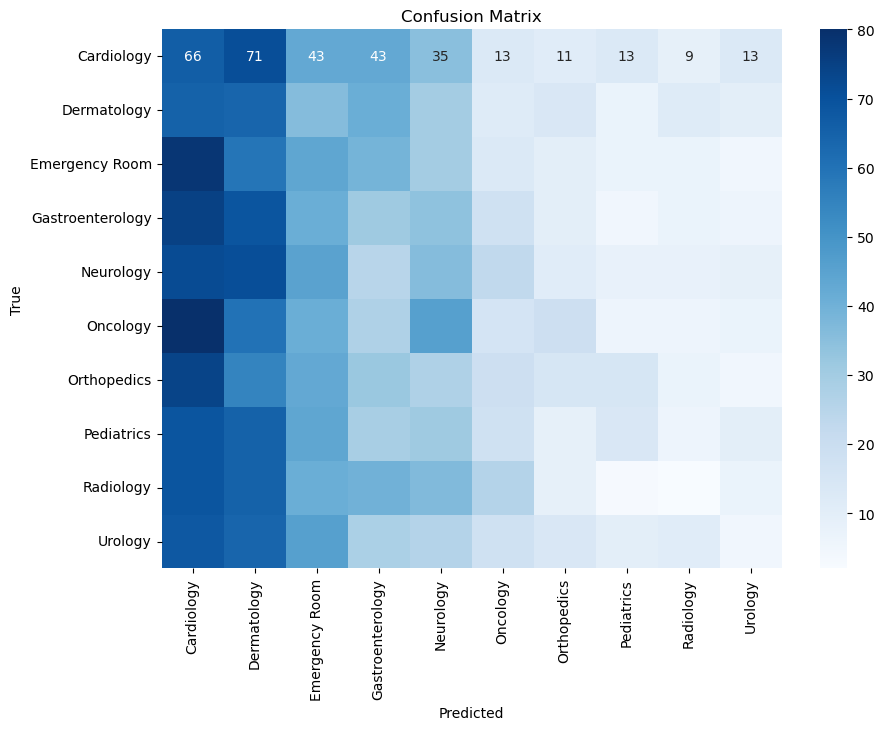

Analysis of the k-NN Model Results:
The model might be underfitting the data. Consider using more features, different features, or a more complex model.
Training Accuracy: 0.4266035299182092
Testing Accuracy: 0.09805890227576974
The model might be overfitting. Consider using regularization techniques or simplifying the model.
Class-specific performance analysis:
Class 'Cardiology': Precision = 0.09217877094972067, Recall = 0.2082018927444795, F1 Score = 0.12778315585672798
Class 'Dermatology': Precision = 0.09953343701399689, Recall = 0.21993127147766323, F1 Score = 0.13704496788008566
Class 'Emergency Room': Precision = 0.10377358490566038, Recall = 0.1506849315068493, F1 Score = 0.12290502793296089
Class 'Gastroenterology': Precision = 0.09253731343283582, Recall = 0.10472972972972973, F1 Score = 0.098256735340729
Class 'Neurology': Precision = 0.10843373493975905, Recall = 0.11688311688311688, F1 Score = 0.11249999999999999
Class 'Oncology': Precision = 0.09090909090909091, Recall =

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv(r"C:\Users\ganes\Downloads\combinedData.csv")

# Display the first few rows of the dataset
print(df.head())

# Select the target column (for this example, we'll use 'Hospital Department')
target = 'Hospital Department'

# Handle missing values (if any)
df = df.dropna()

#Removing Duplications
data = data.drop_duplicates()

# Dropping irrelevant features
data = data.drop(['patient_name', 'Phone'], axis=1)

# Convert categorical variables to numerical
data = pd.get_dummies(data, columns=['gender', 'blood_type', 'Primary Diagnosis', 'Discharge Status', 
                                     'Follow-Up Visits', 'Insurance Type', 'Income Level', 'Employment Status', 
                                     'Admission Type', 'Admission Source', 'Hospital Department'])


# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' and column != target:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
data[['age', 'Length of Stay']] = scaler.fit_transform(data[['age', 'Length of Stay']])
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)


# Training accuracy
train_accuracy = knn.score(X_train, y_train)
# Testing accuracy
test_accuracy = knn.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')


# Define the parameter grid
param_grid = {'n_neighbors': range(1, 11)}

# Perform Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Analyze and discuss the results
def analyze_results(y_test, y_pred):
    print("Analysis of the k-NN Model Results:")
    
    # Check for underfitting
    if accuracy < 0.60:
        print("The model might be underfitting the data. Consider using more features, different features, or a more complex model.")
    
    # Check for overfitting by comparing training and test accuracy
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {accuracy}")
    
    if train_accuracy - accuracy > 0.1:
        print("The model might be overfitting. Consider using regularization techniques or simplifying the model.")
    else:
        print("The model shows no signs of overfitting.")
    
    # Analyze class-specific performance
    print("Class-specific performance analysis:")
    for class_label in target_encoder.classes_:
        class_index = target_encoder.transform([class_label])[0]
        class_precision = precision_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_recall = recall_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_f1 = f1_score(y_test, y_pred, labels=[class_index], average='weighted')
        print(f"Class '{class_label}': Precision = {class_precision}, Recall = {class_recall}, F1 Score = {class_f1}")

analyze_results(y_test, y_pred)


   Patient ID        patient_name  age gender              Phone blood_type  \
0           1       Guido O' Gara   63   Male  +264 355 532 6049          A   
1           2     Kennie Blockley   12   Male   +62 449 137 7638          O   
2           3    Sheffie Kennford   77   Male  +387 392 769 7795         AB   
3           4        Noel Hearsum  100   Male   +62 951 323 1087          A   
4           5  Osbourne Oakeshott   71   Male  +507 355 806 1389          O   

  diagnosis_code admission_date discharge_date  Primary Diagnosis  ...  \
0        S92532P     10/14/2015     10/30/2000           Migraine  ...   
1        T481X5S      10/8/2015      7/10/2011       Appendicitis  ...   
2        S63610A       9/9/2004      2/15/2005          Pneumonia  ...   
3          T3995      7/11/2017       8/7/2018  Allergic reaction  ...   
4           Z821       2/1/2012     11/22/2022        Common cold  ...   

                Discharge Status Follow-Up Visits    Insurance Type  \
0        

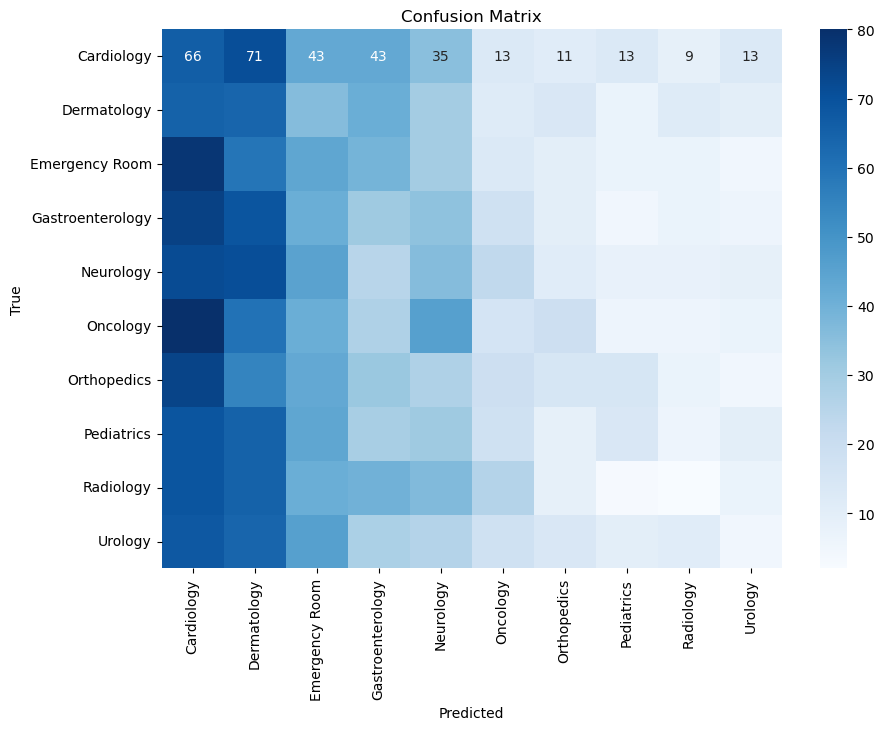

Analysis of the k-NN Model Results:
The model might be underfitting the data. Consider using more features, different features, or a more complex model.
Training Accuracy: 0.4266035299182092
Testing Accuracy: 0.09805890227576974
The model might be overfitting. Consider using regularization techniques or simplifying the model.
Class-specific performance analysis:
Class 'Cardiology': Precision = 0.09217877094972067, Recall = 0.2082018927444795, F1 Score = 0.12778315585672798
Class 'Dermatology': Precision = 0.09953343701399689, Recall = 0.21993127147766323, F1 Score = 0.13704496788008566
Class 'Emergency Room': Precision = 0.10377358490566038, Recall = 0.1506849315068493, F1 Score = 0.12290502793296089
Class 'Gastroenterology': Precision = 0.09253731343283582, Recall = 0.10472972972972973, F1 Score = 0.098256735340729
Class 'Neurology': Precision = 0.10843373493975905, Recall = 0.11688311688311688, F1 Score = 0.11249999999999999
Class 'Oncology': Precision = 0.09090909090909091, Recall =

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

# Load the dataset
df = pd.read_csv(r"C:\Users\ganes\Downloads\combinedData.csv")

# Display the first few rows of the dataset
print(df.head())

# Select the target column (for this example, we'll use 'Hospital Department')
target = 'Hospital Department'

# Handle missing values (if any)
df = df.dropna()

# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' and column != target:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)

cross_val_scores = cross_val_score(knn, X, y, cv=5)
print(f"Cross-Validation Scores: {cross_val_scores}")
print(f"Mean Cross-Validation Score: {cross_val_scores.mean()}")


# Training accuracy
train_accuracy = knn.score(X_train, y_train)
# Testing accuracy
test_accuracy = knn.score(X_test, y_test)

print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')


# Define the parameter grid
param_grid = {'n_neighbors': range(1, 11)}

# Perform Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Analyze and discuss the results
def analyze_results(y_test, y_pred):
    print("Analysis of the k-NN Model Results:")
    
    # Check for underfitting
    if accuracy < 0.60:
        print("The model might be underfitting the data. Consider using more features, different features, or a more complex model.")
    
    # Check for overfitting by comparing training and test accuracy
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {accuracy}")
    
    if train_accuracy - accuracy > 0.1:
        print("The model might be overfitting. Consider using regularization techniques or simplifying the model.")
    else:
        print("The model shows no signs of overfitting.")
    
    # Analyze class-specific performance
    print("Class-specific performance analysis:")
    for class_label in target_encoder.classes_:
        class_index = target_encoder.transform([class_label])[0]
        class_precision = precision_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_recall = recall_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_f1 = f1_score(y_test, y_pred, labels=[class_index], average='weighted')
        print(f"Class '{class_label}': Precision = {class_precision}, Recall = {class_recall}, F1 Score = {class_f1}")

analyze_results(y_test, y_pred)


   Patient ID        patient_name  age gender              Phone blood_type  \
0           1       Guido O' Gara   63   Male  +264 355 532 6049          A   
1           2     Kennie Blockley   12   Male   +62 449 137 7638          O   
2           3    Sheffie Kennford   77   Male  +387 392 769 7795         AB   
3           4        Noel Hearsum  100   Male   +62 951 323 1087          A   
4           5  Osbourne Oakeshott   71   Male  +507 355 806 1389          O   

  diagnosis_code admission_date discharge_date  Primary Diagnosis  ...  \
0        S92532P     10/14/2015     10/30/2000           Migraine  ...   
1        T481X5S      10/8/2015      7/10/2011       Appendicitis  ...   
2        S63610A       9/9/2004      2/15/2005          Pneumonia  ...   
3          T3995      7/11/2017       8/7/2018  Allergic reaction  ...   
4           Z821       2/1/2012     11/22/2022        Common cold  ...   

                Discharge Status Follow-Up Visits    Insurance Type  \
0        

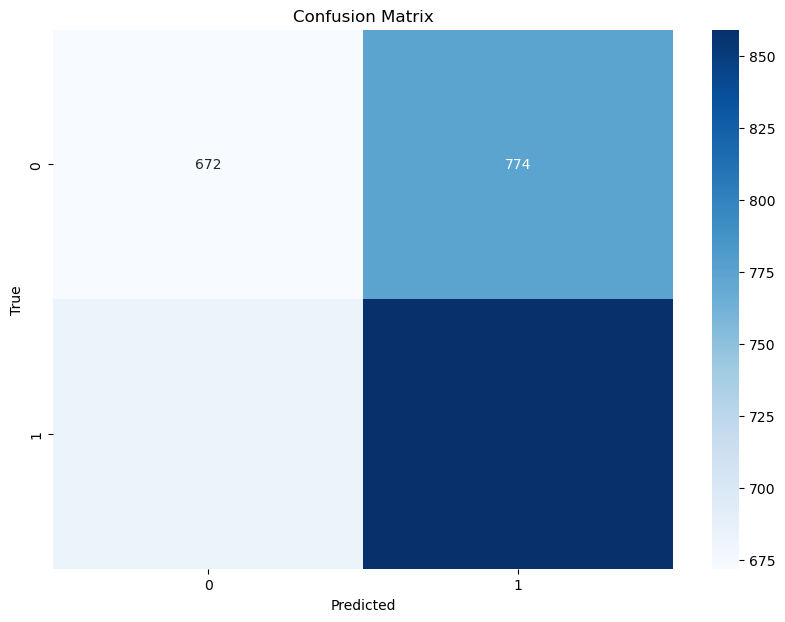

Analysis of the k-NN Model Results:
The model might be underfitting the data. Consider using more features, different features, or a more complex model.
Training Accuracy: 0.7527622327450136
Testing Accuracy: 0.5123828647925034
The model might be overfitting. Consider using regularization techniques or simplifying the model.
Class-specific performance analysis:
Class '0': Precision = 0.4959409594095941, Recall = 0.46473029045643155, F1 Score = 0.4798286326312031
Class '1': Precision = 0.5260257195345989, Recall = 0.5570687418936446, F1 Score = 0.5411023622047243


In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

# Load the dataset
df = pd.read_csv(r"C:\Users\ganes\Downloads\combinedData.csv")

# Display the first few rows of the dataset
print(df.head())

# Select the target column (for this example, we'll use 'Hospital Department')
target = 'Readmission'

# Handle missing values (if any)
df = df.dropna()

# Encode categorical features
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object' and column != target:
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

# Encode the target variable
target_encoder = LabelEncoder()
df[target] = target_encoder.fit_transform(df[target])

# Separate features and target
X = df.drop(columns=[target])
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the k-NN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Make predictions
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
print("Classification Report:\n", classification_rep)


# Training accuracy
train_accuracy = knn.score(X_train, y_train)
# Testing accuracy
test_accuracy = knn.score(X_test, y_test)



# Define the parameter grid
param_grid = {'n_neighbors': range(1, 11)}

# Perform Grid Search
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Analyze and discuss the results
def analyze_results(y_test, y_pred):
    print("Analysis of the k-NN Model Results:")
    
    # Check for underfitting
    if accuracy < 0.60:
        print("The model might be underfitting the data. Consider using more features, different features, or a more complex model.")
    
    # Check for overfitting by comparing training and test accuracy
    train_pred = knn.predict(X_train)
    train_accuracy = accuracy_score(y_train, train_pred)
    
    print(f"Training Accuracy: {train_accuracy}")
    print(f"Testing Accuracy: {accuracy}")
    
    if train_accuracy - accuracy > 0.1:
        print("The model might be overfitting. Consider using regularization techniques or simplifying the model.")
    else:
        print("The model shows no signs of overfitting.")
    
    # Analyze class-specific performance
    print("Class-specific performance analysis:")
    for class_label in target_encoder.classes_:
        class_index = target_encoder.transform([class_label])[0]
        class_precision = precision_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_recall = recall_score(y_test, y_pred, labels=[class_index], average='weighted')
        class_f1 = f1_score(y_test, y_pred, labels=[class_index], average='weighted')
        print(f"Class '{class_label}': Precision = {class_precision}, Recall = {class_recall}, F1 Score = {class_f1}")

analyze_results(y_test, y_pred)

